#  1. Importing Libraries & Data Set 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Folder path
path = r'C:\Users\Lucero\Documents\Instacart Basket Analysis\02 Data'

In [3]:
# importing pickle file with most recent data
df_main  = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_ords_prods_custmrs.pkl'))


In [4]:
# importing department dictionary data
df_dict = pd.read_csv(os.path.join(path, 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

# 2. Security Implications

In [5]:
# checking the given information
df_main.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,order_freq_flag,first_name,last_name,gender,state,age,registration_date,number_dependants,marital_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Spending Habits by Region

3.1 Region Column

In [6]:
# region 1: ME, NH, VT, MA, RI, CT, NY, PA, NJ
# indicating region 1 states in the region col
df_main.loc[df_main['state'].isin(['Maine', 
                                   'New Hampshire',
                                   'Vermont',
                                   'Massachusetts',
                                   'Rhode Island',
                                   'Connecticut',
                                   'New York',
                                   'Pennsylvania',
                                   'New Jersey',]), 'region'] = 1

In [7]:
# Region 2: WI, MI, IL, IN, OH, ND, SD, NE, KS, MN, IA, MS
# indicating the regions 2 states in the region col
df_main.loc[df_main['state'].isin(['Wisconsin',
                                   'Michigan',
                                   'Illinois',
                                   'Indiana',
                                   'Ohio',
                                   'North Dakota',
                                   'South Dakota',
                                   'Nebraska',
                                   'Kansas',
                                   'Minnesota',
                                   'Iowa',
                                   'Missouri',
                                    ]), 'region'] = 2

In [8]:
# Region 3: DE, MD, D.C., VA, WV, NC, SC, GA, FL, KY, TN, MI, AL. OK, TX, AR, LA
df_main.loc[df_main['state'].isin(['Delaware',
                                  'Maryland',
                                  'District of Columbia',
                                  'Virginia',
                                  'West Virginia',
                                  'North Carolina',
                                  'South Carolina',
                                  'Georgia',
                                  'Florida',
                                  'Kentucky',
                                  'Tennessee',
                                  'Mississippi',
                                  'Alabama',
                                  'Oklahoma',
                                  'Texas',
                                  'Arkansas',
                                  'Louisiana']), 'region'] = 3

In [9]:
# Region 4: ID, MT, WY, NV, UT, CO, AZ, NM, AK, WA, OR, CA, HW
df_main.loc[df_main['state'].isin(['Idaho',
                                  'Montana',
                                  'Wyoming',
                                  'Nevada',
                                  'Utah',
                                  'Colorado',
                                  'Arizona',
                                  'Alaska',
                                  'New Mexico',
                                  'Washington',
                                  'Oregon',
                                  'California',
                                  'Hawaii'
                                   ]), 'region'] = 4

In [10]:
# checking region col 
df_main['region'].value_counts(dropna = False)

3.0    10791885
4.0     8292913
2.0     7597325
1.0     5722736
Name: region, dtype: int64

In [11]:
# Finding NaN states 
df_main[df_main['region'].isnull()]

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,registration_date,number_dependants,marital_status,income,region


3.2. Spending Trends by Region

In [12]:
# listing the col names
df_main.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_freq',
       'order_freq_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'registration_date', 'number_dependants', 'marital_status', 'income',
       'region'],
      dtype='object')

In [13]:
# crossing the region and spending crosstab
region_spending = pd.crosstab(df_main['region'], df_main['spending_flag'], dropna = False)

In [14]:
# viewing the crosstab 
region_spending

spending_flag,High spender,Low spender
region,,
1.0,108225,5614511
2.0,155975,7441350
3.0,209691,10582194
4.0,160354,8132559


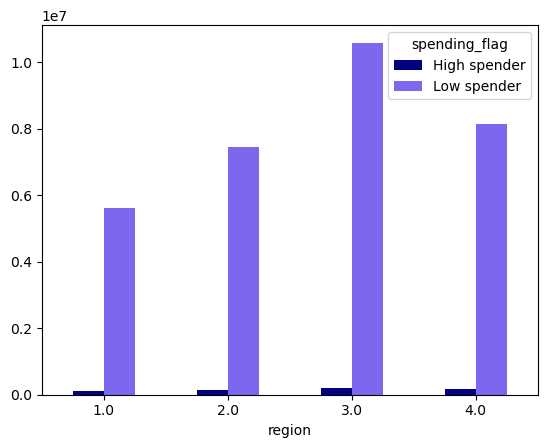

In [15]:
# bar graph for the spending flag distribution 
region_bar = region_spending.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue'])

In [16]:
# exporting the bar graph
# loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_bar.png'))

# 4. Active Customer Dataset

In [17]:
# creating the low_activity flag
df_main.loc[df_main['max_order'] < 5, 'activity_flag'] = 'low activity'

In [18]:
# creating the good_activity 
df_main.loc[df_main['max_order'] >= 5, 'activity_flag'] = 'good activity'

In [19]:
# checking the activity flag
df_main['activity_flag'].value_counts(dropna = False)

good activity    30964564
low activity      1440295
Name: activity_flag, dtype: int64

In [20]:
# creating the subset dataframe without low-acitivity customers
df_active_users = df_main.loc[df_main['activity_flag'] == 'good activity']

In [21]:
# checking the active users table
df_active_users.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,last_name,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3.0,good activity
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3.0,good activity
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3.0,good activity
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3.0,good activity
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3.0,good activity


In [22]:
# exporting the sample
df_active_users.to_pickle(os.path.join(path, 'Prepared Data', 'active_users_sample.pkl'))

# 5. Customer Profiling

In [23]:
# descriptive statistics on the age, income, and number of dependents parameters
df_main[['age', 'income', 'number_dependants' ]].describe()

,age,income,number_dependants
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04,1.501896e+00
std,1.848558e+01,4.305727e+04,1.118865e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.700400e+04,1.000000e+00
50%,4.900000e+01,9.661800e+04,2.000000e+00
75%,6.500000e+01,1.279120e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [24]:
# checking the departments
df_dict

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [25]:
# new parent profile (including parents that have a new babies but multiple children)
df_main.loc[(df_main['number_dependants'] >= 1) &  (df_main['department_id'] == 18), 'profile'] = 'New Parent'

In [26]:
# single adult profile
df_main.loc[(df_main['number_dependants'] == 0) &  (df_main['age'] < 65), 'profile'] = 'Single Adult'

In [27]:
# single parent profile
df_main.loc[(df_main['number_dependants'] >= 1) & (df_main['income'] < 50000) &  (df_main['department_id'] != 18), 'profile'] = 'Single Parent'

In [28]:
# partnered parent profile
df_main.loc[(df_main['number_dependants'] >= 1) & (df_main['income'] >= 50000) &  (df_main['department_id'] != 18), 'profile'] = 'Partnered Parent'

In [29]:
# retired adult profile
df_main.loc[(df_main['number_dependants'] == 0) &  (df_main['age'] >= 65), 'profile'] = 'Retired Adult'

In [30]:
# checking for profiles
df_main['profile'].value_counts(dropna = False)

Partnered Parent    21323133
Single Adult         5977419
Single Parent        2666915
Retired Adult        2120084
New Parent            317308
Name: profile, dtype: int64

# 6. Profile Distribution

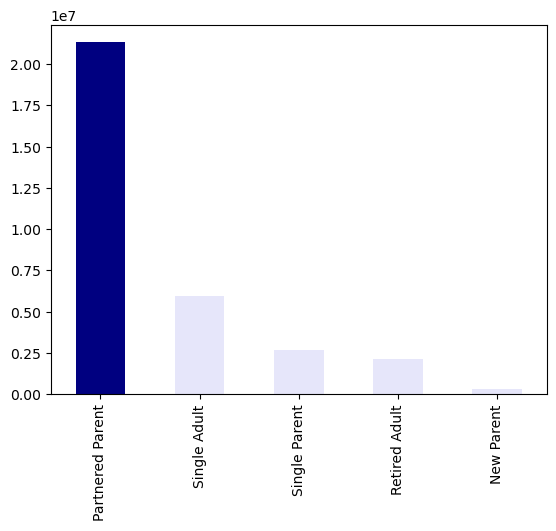

In [31]:
# profie distibution 
profile_dist_bar = df_main['profile'].value_counts().plot.bar(color = ['navy', 'lavender', 'lavender', 'lavender', 'lavender'])

In [32]:
# exporting the visualiation
profile_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_distibution_bar.png'))

# 7. Profile Aggregation

In [33]:
# grouping profiles by mean, max, and min expenditure 
df_main.groupby('profile').agg({'prices' : ['mean', 'max', 'min']})

prices              
                       mean      max  min
profile                                  
New Parent         7.650679     15.0  1.0
Partnered Parent  12.649539  99999.0  1.0
Retired Adult     11.905177  99999.0  1.0
Single Adult      12.208715  99999.0  1.0
Single Parent      6.691449     25.0  1.0

In [34]:
# grouping profiles by mean, max, and min usage frequency (with days_since_prior_order)
df_main.groupby('profile').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                                   mean   max  min
profile                                           
New Parent                     9.963975  30.0  0.0
Partnered Parent              11.066002  30.0  0.0
Retired Adult                 11.065273  30.0  0.0
Single Adult                  11.086311  30.0  0.0
Single Parent                 11.621855  30.0  0.0

# 8. Customer Profiles by Region and Department

8.1 Profiles by Region

In [35]:
# crosstab comparing profiles and region
regional_profiles = pd.crosstab(df_main['profile'], df_main['region'])

In [36]:
# checking the regional profiles crosstab
regional_profiles

region,1.0,2.0,3.0,4.0
profile,,,,
New Parent,56621,73594,107309,79784
Partnered Parent,3788490,4991867,7080228,5462548
Retired Adult,395847,492762,691055,540420
Single Adult,1022454,1412438,2010604,1531923
Single Parent,459324,626664,902689,678238


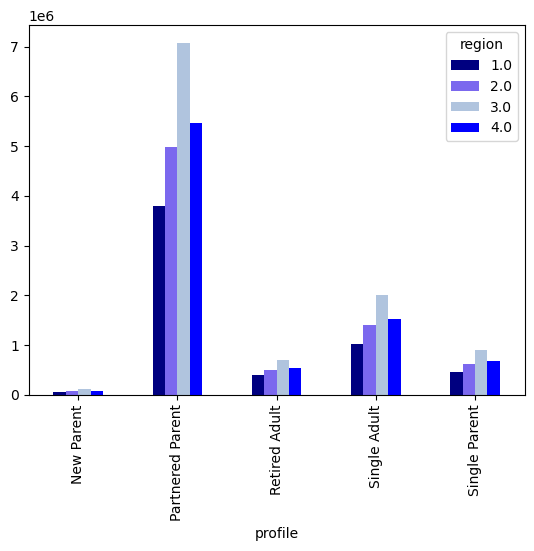

In [37]:
regional_profiles_bar = regional_profiles.plot.bar( color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue'])

In [38]:
# creating a crosstab of the profiles by region
prof_by_reg = pd.crosstab(df_main['region'], df_main['profile'])

In [39]:
# checking the profile be region crossbar
prof_by_reg

profile,New Parent,Partnered Parent,Retired Adult,Single Adult,Single Parent
region,,,,,
1.0,56621,3788490,395847,1022454,459324
2.0,73594,4991867,492762,1412438,626664
3.0,107309,7080228,691055,2010604,902689
4.0,79784,5462548,540420,1531923,678238


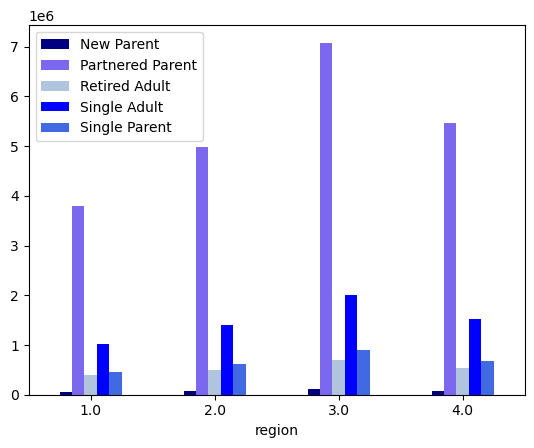

In [40]:
# creating a bar chart showing profiles by region
prof_by_reg_bar = prof_by_reg.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])
plt.legend(loc = 'best')

In [41]:
# exporting the profile by region bar graph
prof_by_reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region_bar.png'))

8.2 Profiles by department

In [42]:
# creating crosstab of profiles by departments
prof_by_dep = pd.crosstab(df_main['department_id'], df_main['profile'])

In [43]:
# checking the prof by dep crosstab
prof_by_dep

profile,New Parent,Partnered Parent,Retired Adult,Single Adult,Single Parent
department_id,,,,,
1,0,1502578,148333,408827,175005
2,0,24102,2291,6884,3014
3,0,791765,76021,218384,86258
4,0,6442856,623025,1752420,660990
5,0,99495,9764,29354,15083
6,0,184106,17494,50219,17434
7,0,1709435,176427,498015,304246
8,0,66211,7024,17559,6922
9,0,598751,56303,158959,52614


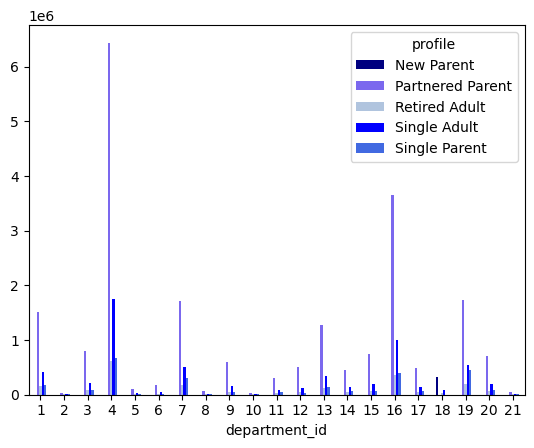

In [44]:
# visualizing the relationship between department and profile
prof_by_dep_bar = prof_by_dep.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

In [45]:
# exporting the profiles by department bar graph
prof_by_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_department.png'))

8.3 Comparing Regional Profiles by Department

In [46]:
# creating region 1 df
df_reg_1 = df_main.loc[df_main['region'] == 1]

In [47]:
# checking region 1 df
df_reg_1['region'].value_counts(dropna = False)

1.0    5722736
Name: region, dtype: int64

In [48]:
# creating region 2 df
df_reg_2 = df_main.loc[df_main['region'] == 2]

In [49]:
# checking region 2 df
df_reg_2['region'].value_counts(dropna = False)

2.0    7597325
Name: region, dtype: int64

In [50]:
# creating region 3 df
df_reg_3 = df_main.loc[df_main['region'] == 3]

In [51]:
# checking region 3 df
df_reg_3['region'].value_counts(dropna = False)

3.0    10791885
Name: region, dtype: int64

In [52]:
# creating region 4 df
df_reg_4 = df_main.loc[df_main['region'] == 4]

In [53]:
# checking region 4 df
df_reg_4['region'].value_counts(dropna = False)

4.0    8292913
Name: region, dtype: int64

Creating cross tabs

In [54]:
# crosstab for region 1
reg_1_cross = pd.crosstab(df_reg_1['department_id'], df_reg_1['profile'])

In [55]:
# crosstab for region 2
reg_2_cross = pd.crosstab(df_reg_2['department_id'], df_reg_2['profile'])

In [56]:
# crosstab for region 3
reg_3_cross = pd.crosstab(df_reg_3['department_id'], df_reg_3['profile'])

In [57]:
# crosstab for region 4
reg_4_cross = pd.crosstab(df_reg_4['department_id'], df_reg_4['profile'])

Creating visualizations

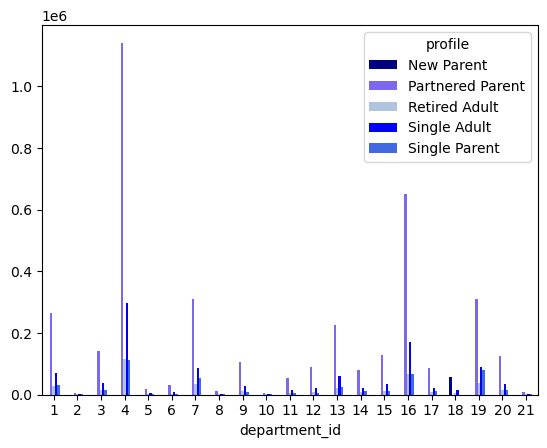

In [58]:
# bar graph of the region 1 profiles be department
reg_1_prof_dep_bar = reg_1_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

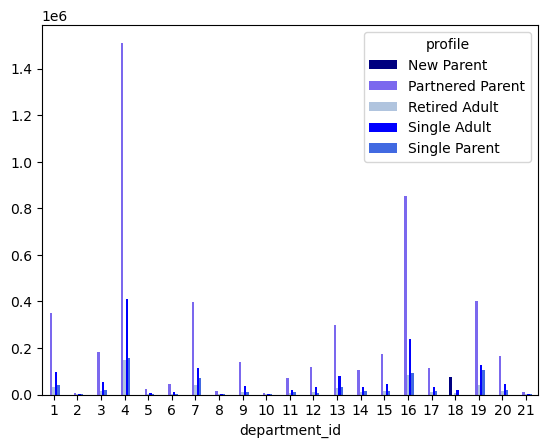

In [59]:
# bar graph of the region 2 profiles be department
reg_2_prof_dep_bar = reg_2_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

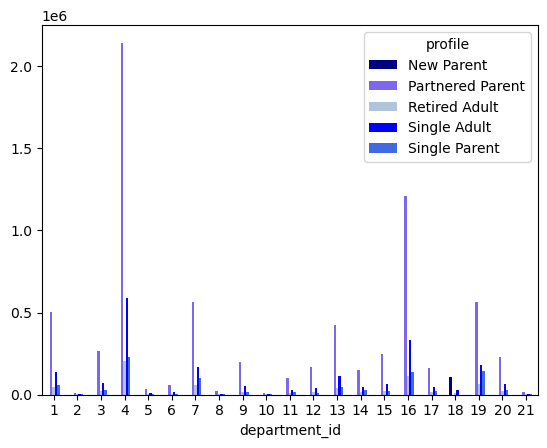

In [60]:
# bar graph of the region 3 profiles be department
reg_3_prof_dep_bar = reg_3_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

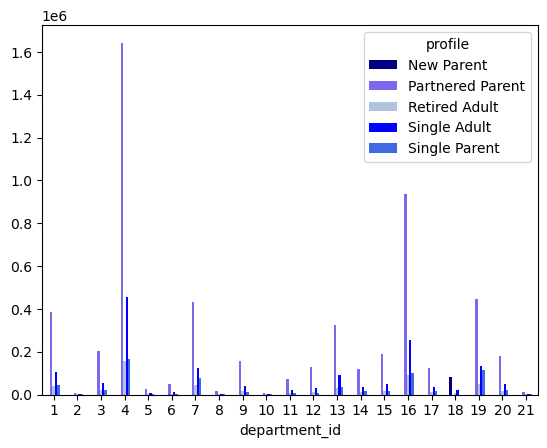

In [61]:
# bar graph of the region 4 profiles be department
reg_4_prof_dep_bar = reg_4_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

In [62]:
# exporting the region 1 bar chart
reg_1_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_1_profiles_by_department.png'))

In [63]:
# exporting the region 2 bar chart
reg_2_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_2_profiles_by_department.png'))

In [64]:
# exporting the region 3 bar chart
reg_3_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_3_profiles_by_department.png'))

In [65]:
# exporting the region 4 bar chart
reg_4_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_4_profiles_by_department.png'))

# 9. Exporting Dataframe

In [66]:
df_main.to_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers_merged_final.pkl'))

In [67]:
df_main['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64